*David Sneider Ovalle Pineda /*
*Algoritmos /*
*Laboratorio* *9* 

Code THE STABLE ROOMATES PROBLEM of Irving
http://www.dcs.gla.ac.uk/~pat/jchoco/roommates/papers/Comp_sdarticle.pdf
Este es el codigo del libro pero no me compilo correctamente en compiladores de pascal. Busque varias formas para resolver los ejercicios


In [44]:
{

                            Online Pascal Compiler.
                Code, Compile, Run and Debug Pascal program online.
Write your code in this editor and press "Run" button to execute it.

}

program SR;
const SIZE = 91; {FOR PROBLEM INSTANCES OF SIZE < = 90,
ALLOWING FOR SENTINELS}
type person_type = 0..SIZE; rank_type = 0..SIZE;
    matrix = array[person_type,rank_type] of person_type;
    vector = array[person_type] of person_type;
    set_type = set of person_type;
procedure room_mates(var preference : matrix; n : integer;var partner : vector; var soln_found : boolean);
var ranking : array[person_type,person_type] of rank_type;
    leftmost,second,rightmost : array[person_type] of rank_type;
    cycle : array[rank_type] of person_type;
    person,first_unmatched : person_type;
    rank,first_in_cycle,last_in_cycle : rank_type;
    soln_possible : boolean;
    tail : set_type;
    
procedure phase_1_reduce(var soln_possible : boolean);
var set_proposed_to : set_type;
    person,proposer,next_choice,current : person_type; 
begin
    set_proposed_to := [];
    for person := 1 to n do
    begin
        proposer := person;
        repeat
            next_choice := preference[proposer,leftmost[proposer]];
            {BEST POTENTIAL PARTNER}
            current := preference[next_choice,rightmost[next_choice]];
            {NEXT_CHOICE HOLDS CURRENT}
            while ranking[next_choice,proposer] > ranking[next_choice,current]
            do
            begin {PROPOSER IS REJECTED BY NEXT_CHOICE}
                leftmost[proposer] := leftmost[proposer] + 1;
                next_choice := preference[proposer,leftmost[proposer]];
                current := preference[next_choice,rightmost[next_choice]]
            end;
            rightmost[next_choice] := ranking[next_choice,proposer];
            {NEXT_CHOICE HOLDS PROPOSER}
            proposer := current
            {AND REJECTS CURRENT}
        until not (next_choice in set_proposed_to);
        set_proposed_to := set_proposed_to + [next_choice]
    end;
    soln_possible := proposer = next_choice
end; {phase_l_reduce}

procedure find(var first_unmatched : person_type);
begin {FINDS FIRST PERSON WITH > 1 POTENTIAL PARTNER}
    while leftmost[first_unmatched] = rightmost[first_unmatched] do
    begin
        first_unmatched := first_unmatched + 1
    end; {find}
end;
procedure seek_cycle(var first_in_cycle,last_in_cycle : rank_type;first_unmatched : person_type; var tail : set_type);
var cycle_set : set_type;
    person,next_choice : person_type;
    posn_in_cycle,pos_in_list : rank_type;
begin
    if first_in_cycle > 1 then 
        begin
        person := cycle[first_in_cycle-1]; {LAST PERSON IN
PREVIOUS TAIL}
        posn_in_cycle := first_in_cycle-1; {HIS SECOND CHOICE MAY
        HAVE TO BE UPDATED}
        cycle_set := tail
    end
    else 
        begin
            cycle_set := [];
            posn_in_cycle := 1;
            person := first_unmatched
    end;
repeat {GENERATE SEQUENCE}
    cycle_set := cycle_set + [person];
    cycle[posn_in_cycle] := person;
    posn_in_cycle := posn_in_cycle + 1;
    pos_in_list := second[person];
    repeat {UPDATE SECOND CHOICE FOR CURRENT PERSON}
        next_choice := preference[person,pos_in_list];
        pos_in_list := pos_in_list + 1
    until ranking[next_choice,person] <= rightmost[next_choice];
    second[person] := pos_in_list-1;
    person := preference[next_choice,rightmost[next_choice]]
until person in cycle_set; {SEQUENCE STARTS TO CYCLE}
last_in_cycle := posn_in_cycle-1;
tail := cycle_set;
repeat {WORK BACK TO BEGINNING OF CYCLE}
    posn_in_cycle := posn_in_cycle-1;
    tail := tail-[cycle[posn_in_cycle]]
until cycle[posn_in_cycle] = person;
first_in_cycle := posn_in_cycle
end; {seek_cycle}

procedure phase_2_reduce(first_in_cycle,last_in_cycle : rank_type; var soln_possible : boolean);
var proposer,next_choice : person_type;
    rank : rank_type;
begin
    for rank := first_in_cycle to last_in_cycle do
    begin {ALLOW NEXT PERSON IN CYCLE TO BE REJECTED}
        proposer := cycle[rank];
        leftmost[proposer] := second[proposer];
        second[proposer] := leftmost[proposer] + 1; {PROPER UPDATE
        UNNECESSARY AT THIS STAGE}
        next_choice := preference[proposer,leftmost[proposer]]; 
        rightmost[next_choice] := ranking[next_choice,proposer]
        {NEXT_CHOICE HOLDS PROPOSER}
    end;
    rank := first_in_cycle;
    while (rank <= last_in_cycle) and soln_possible do
    begin {CHECK NO_ONE HAS RUN OUT
    OF POTENTIAL PARTNERS}
        proposer := cycle[rank];
        soln_possible := leftmost[proposer] <= rightmost[proposer];
        rank:=rank+1
    end
end; { phaseZ_reduce}

begin
    soln_found := false;
    first_unmatched := 1;
    first_in_cycle := 1;
    for person := 1 to n do
    begin
        preference[person,n] := person; {SENTINEL}
        for rank := 1 to n do
            ranking[person,preference[person,rank]] := rank;
        leftmost[person] := 1;
        rightmost[person] := n
    end;
    leftmost[n + 1] := 1; rightmost[n + 1] := n; {SENTINELS FOR
    PROCEDURE FIND}
    phase_1_reduce(soln_possible);
    for person := 1 to n do
        second[person] := leftmost[person] + 1; {PROPER INITIALISATION UNNECESSARY}
    while soln_possible and not soln_found do
    begin
        find(first_unmatched);
        if first_unmatched > n
        then soln_found := true
        else begin
            seek_cycle(first_in_cycle,last_in_cycle,first_unmatched,tail);
            phase_2_reduce(first_in_cycle,last_in_cycle,soln_possible)
        end
    end;
    if soln_found 
    then for person := 1 to n do
            partner[person] := preference[person,leftmost[person]]
end; {roommates} 


SyntaxError: ignored

In [45]:
from matching import Player

suitors = [
    Player(name="uno"),
    Player(name="dos"),
    Player(name="tres"),
    Player(name="cuatro"),
    Player(name="cinco"),
]

reviewers = [
    Player(name="A"),
    Player(name="B"),
    Player(name="C"),
    Player(name="D"),
    Player(name="E")
]
print (suitors)
uno, dos, tres, cuatro, cinco = suitors
for i in suitors: 
  print (i)
A, B, C, D, E = reviewers

uno.set_prefs([C,B,E,A,D])
dos.set_prefs([A,B,E,C,D])
tres.set_prefs([D,C,B,A,E])
cuatro.set_prefs([A,C,D,B,E])
cinco.set_prefs([A,B,D,E,C])

A.set_prefs([tres,cinco,dos,uno,cuatro])
B.set_prefs([cinco,dos,uno,cuatro,tres])
C.set_prefs([cuatro,tres,cinco,uno,dos])
D.set_prefs([uno,dos,tres,cuatro,cinco])
E.set_prefs([dos,tres,cuatro,uno,cinco])

from matching.games import StableMarriage

game = StableMarriage(suitors, reviewers)
game.solve()

[uno, dos, tres, cuatro, cinco]
uno
dos
tres
cuatro
cinco


{uno: E, dos: B, tres: D, cuatro: C, cinco: A}

In [46]:
from matching import Player

students = [
    Player(name="uno"),
    Player(name="dos"),
    Player(name="tres"),
    Player(name="cuatro"),
    Player(name="cinco"),
]

uno, dos, tres, cuatro, cinco = students

uno.set_prefs([tres,cinco,dos,cuatro])
dos.set_prefs([cinco,uno,cuatro,tres])
tres.set_prefs([cuatro,cinco,uno,dos])
cuatro.set_prefs([uno,dos,tres,cinco])
cinco.set_prefs([dos,tres,cuatro,uno])

from matching.games import StableRoommates

game = StableRoommates(students)
game.solve()

/usr/local/lib/python3.6/dist-packages/matching/algorithms/stable_roommates.py:101: NoStableMatchingWarning: The following players have emptied their preference list: [uno, tres, cuatro]
  "The following players have emptied their preference list: "


{uno: None, dos: cinco, tres: None, cuatro: None, cinco: dos}

1. Find the best and worst cases for the Gale-Shapley and Irving (An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for $n=4$ and $40$.

In [47]:
%pylab inline
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time', 'copy', 'e', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


```
function stableMatching {
    Initialize all m ∈ M and w ∈ W to free
    while ∃ free man m who still has a woman w to propose to {
       w = first woman on m’s list to whom m has not yet proposed
       if w is free
         (m, w) become engaged
       else some pair (m', w) already exists
         if w prefers m to m'
            m' becomes free
           (m, w) become engaged 
         else
           (m', w) remain engaged
    }
}
```


In [82]:
def gale(man_list, women_list, man_df, women_df):
  # diccionario para ver cada mujer que cada hombre puede proponersele
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0

  # mientras no todos los hombres tengan pareja
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # si una mujer llega a tener más de un proponiente
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # un hombre que ha creado una pareja se añade a la lista de espera
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1

  return proposals, count

n = 4

In [49]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

In [50]:
women_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,1,3,4], 'C':[3,2,1,4], 'D':[4,2,3,1]})
women_df.index = man_list

In [51]:
man_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,1,3,4], 'C':[3,2,1,4], 'D':[4,2,3,1]})
man_df.index = man_list

In [52]:
women_df

,A,B,C,D
a,1,2,3,4
b,2,1,2,2
c,3,3,1,3
d,4,4,4,1


In [53]:
man_df

,A,B,C,D
a,1,2,3,4
b,2,1,2,2
c,3,3,1,3
d,4,4,4,1


In [54]:
time0 = time()
proposals, count = gale(man_list, women_list, man_df, women_df)
print("Proposals:", proposals, "\n\t--> Iteraciones:", count)
time1 = time()
print("\t--> Tiempo de ejecución:", time1 - time0)

Proposals: {('a', 'A'): (1, 1), ('b', 'B'): (1, 1), ('c', 'C'): (1, 1), ('d', 'D'): (1, 1)} 
	--> Iteraciones: 1
	--> Tiempo de ejecución: 0.007073402404785156


Peores casos


In [55]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

In [56]:
man_df

,A,B,C,D
a,1,2,3,4
b,2,1,2,2
c,3,3,1,3
d,4,4,4,1


In [57]:
women_df

,A,B,C,D
a,1,2,3,4
b,2,1,2,2
c,3,3,1,3
d,4,4,4,1


In [58]:
man_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,3,1,4], 'C':[3,1,2,4], 'D':[1,2,3,4]})
man_df.index = man_list

women_df = pd.DataFrame({'A': [2,3,4,1], 'B': [3,4,1,2], 'C':[4,1,2,3], 'D':[1,2,3,4]})
women_df.index = man_list

In [59]:
time0 = time()
proposals, count = gale(man_list, women_list, man_df, women_df)
print("Proposals:", proposals, "\n\t--> Iteraciones:", count)
time1 = time()
print("\t--> Tiempo de ejecución:", time1 - time0)

Proposals: {('b', 'C'): (1, 1), ('c', 'B'): (1, 1), ('d', 'A'): (4, 1), ('a', 'D'): (1, 1)} 
	--> Iteraciones: 2
	--> Tiempo de ejecución: 0.007361650466918945


n = 40

In [60]:
man_list = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
            'm11', 'm12', 'm13', 'm14', 'm15', 'm16', 'm17', 'm18', 'm19', 'm20',
            'm21', 'm22', 'm23', 'm24', 'm25', 'm26', 'm27', 'm28', 'm29', 'm30',
            'm31', 'm32', 'm33', 'm34', 'm35', 'm36', 'm37', 'm38', 'm39', 'm40']
women_list = ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10',
              'w11', 'w12', 'w13', 'w14', 'w15', 'w16', 'w17', 'w18', 'w19', 'w20',
              'w21', 'w22', 'w23', 'w24', 'w25', 'w26', 'w27', 'w28', 'w29', 'w30',
              'w31', 'w32', 'w33', 'w34', 'w35', 'w36', 'w37', 'w38', 'w39', 'w40']              
count_list = []
n = 40
preference_list = [i for i in range(1, 41)]

women_df = pd.DataFrame({'w1': preference_list, 'w2': preference_list, 'w3':preference_list, 'w4':preference_list, 'w5':preference_list, 'w6': preference_list, 'w7':preference_list, 'w8':preference_list, 'w9':preference_list, 'w10':preference_list,
                          'w11': preference_list, 'w12': preference_list, 'w13':preference_list, 'w14':preference_list, 'w15':preference_list, 'w16': preference_list, 'w17':preference_list, 'w18':preference_list, 'w19':preference_list, 'w20':preference_list,
                          'w21': preference_list, 'w22': preference_list, 'w23':preference_list, 'w24':preference_list, 'w25':preference_list, 'w26': preference_list, 'w27':preference_list, 'w28':preference_list, 'w29':preference_list, 'w30':preference_list,
                          'w31': preference_list, 'w32': preference_list, 'w33':preference_list, 'w34':preference_list, 'w35':preference_list, 'w36': preference_list, 'w37':preference_list, 'w38':preference_list, 'w39':preference_list, 'w40':preference_list})
women_df.index = man_list
man_df = pd.DataFrame({'w1': preference_list, 'w2': preference_list, 'w3':preference_list, 'w4':preference_list, 'w5':preference_list, 'w6': preference_list, 'w7':preference_list, 'w8':preference_list, 'w9':preference_list, 'w10':preference_list,
                          'w11': preference_list, 'w12': preference_list, 'w13':preference_list, 'w14':preference_list, 'w15':preference_list, 'w16': preference_list, 'w17':preference_list, 'w18':preference_list, 'w19':preference_list, 'w20':preference_list,
                          'w21': preference_list, 'w22': preference_list, 'w23':preference_list, 'w24':preference_list, 'w25':preference_list, 'w26': preference_list, 'w27':preference_list, 'w28':preference_list, 'w29':preference_list, 'w30':preference_list,
                          'w31': preference_list, 'w32': preference_list, 'w33':preference_list, 'w34':preference_list, 'w35':preference_list, 'w36': preference_list, 'w37':preference_list, 'w38':preference_list, 'w39':preference_list, 'w40':preference_list})
man_df.index = man_list
proposals, count = gale(man_list, women_list, man_df, women_df)
count_list.append(count)

In [61]:
time0 = time()
print("Proposals:", proposals, "\n\t--> Iteraciones:", count)
time1 = time()
print("\t--> Tiempo de ejecución:", time1 - time0)

Proposals: {('m1', 'w1'): (1, 1), ('m2', 'w2'): (2, 2), ('m3', 'w3'): (3, 3), ('m4', 'w4'): (4, 4), ('m5', 'w5'): (5, 5), ('m6', 'w6'): (6, 6), ('m7', 'w7'): (7, 7), ('m8', 'w8'): (8, 8), ('m9', 'w9'): (9, 9), ('m10', 'w10'): (10, 10), ('m11', 'w11'): (11, 11), ('m12', 'w12'): (12, 12), ('m13', 'w13'): (13, 13), ('m14', 'w14'): (14, 14), ('m15', 'w15'): (15, 15), ('m16', 'w16'): (16, 16), ('m17', 'w17'): (17, 17), ('m18', 'w18'): (18, 18), ('m19', 'w19'): (19, 19), ('m20', 'w20'): (20, 20), ('m21', 'w21'): (21, 21), ('m22', 'w22'): (22, 22), ('m23', 'w23'): (23, 23), ('m24', 'w24'): (24, 24), ('m25', 'w25'): (25, 25), ('m26', 'w26'): (26, 26), ('m27', 'w27'): (27, 27), ('m28', 'w28'): (28, 28), ('m29', 'w29'): (29, 29), ('m30', 'w30'): (30, 30), ('m31', 'w31'): (31, 31), ('m32', 'w32'): (32, 32), ('m33', 'w33'): (33, 33), ('m34', 'w34'): (34, 34), ('m35', 'w35'): (35, 35), ('m36', 'w36'): (36, 36), ('m37', 'w37'): (37, 37), ('m38', 'w38'): (38, 38), ('m39', 'w39'): (39, 39), ('m40', 'w

Peores casos

In [62]:
# def list_pref_gale(i, j):
n = 4
worst_case_final = []
worst_case = [list(range(i,2*n-1))+list(range(n,i))+[2*n-1] for i in range(n,2*n)] + [list(range((i+1),n))+list(range(i))+[i] for i in range(n)]
for e in range(0, n):
  # for e1 in worst_case:
  #   worst_case_i = e1[][e1 - i for e1 in e]
  worst_case_i = [e1 - 3 for e1 in worst_case[e]]
  worst_case_final.append(worst_case_i)
  # print(worst_case_i)
for k in range(n, n*2):
  worst_case_i = [e1 + 1 for e1 in worst_case[k]]
  worst_case_final.append(worst_case_i)
print(worst_case_final)
  # return worst_case_final[j]

[[1, 2, 3, 4], [2, 3, 1, 4], [3, 1, 2, 4], [1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3], [1, 2, 3, 4]]


In [63]:
# print(list_pref_gale(n, 0))
# man_df = pd.DataFrame({'A': list_pref_gale(n, 0), 'B': list_pref_gale(n, 1), 'C':list_pref_gale(n, 2), 'D':list_pref_gale(n, 3)})
# man_df.index = man_list

# women_df = pd.DataFrame({'A': list_pref_gale(n, 4), 'B': list_pref_gale(n, 5), 'C':list_pref_gale(n, 6), 'D':list_pref_gale(n, 7)})
# women_df.index = man_list

In [64]:
# n = 4
# worst_case = [list(range(i,2*n-1))+list(range(n,i))+[2*n-1] for i in range(n,2*n)] + [list(range((i+1),n))+list(range(i))+[i] for i in range(n)]

# # print(worst_case[3])
# man_df = pd.DataFrame({'A': worst_case[0], 'B': worst_case[1], 'C':worst_case[2], 'D':worst_case[3]})
# man_df.index = man_list

# women_df = pd.DataFrame({'A': worst_case[4], 'B': worst_case[5], 'C':worst_case[6], 'D':worst_case[7]})
# women_df.index = man_list

Algoritmo de Irving

In [65]:
pip install matching

In [66]:
from matching.games import StableRoommates

In [67]:
# Ejemplo de implementación
preferences = {0 : [2, 3, 1, 5, 4], 1 : [5, 4, 3, 0, 2], 2 : [1, 3, 4, 0, 5], 3 : [4, 1, 2, 5, 0], 4 : [2, 0, 1, 3, 5], 5 : [4, 0, 2, 3, 1]}
game = StableRoommates.create_from_dictionary(preferences)
game.solve()

{0: 5, 1: 3, 2: 4, 3: 1, 4: 2, 5: 0}

#### **$n = 4$**

In [68]:
# Ejemplo de implementación
preferences = {0 : [1, 2, 3], 1 : [0, 2, 3], 2 : [3, 0, 1], 3 : [2, 0, 1]}
preferences_df = pd.DataFrame(preferences)
preferences_df.index = ['Cpreferencias 1', 'Cpreferencias 2', 'Cpreferencias 3']
preferences_df

,0,1,2,3
Cpreferencias 1,1,0,3,2
Cpreferencias 2,2,2,0,0
Cpreferencias 3,3,3,1,1


In [69]:
time0 = time()
game = StableRoommates.create_from_dictionary(preferences)
sol = game.solve()
time1 = time()
print(sol)
print("--> Tiempo de ejecución: ", time1 - time0)

{0: 1, 1: 0, 2: 3, 3: 2}
--> Tiempo de ejecución:  0.0004811286926269531


Peores casos


In [70]:
# Ejemplo de implementación
preferences = {0 : [1, 2, 3], 1 : [2, 3, 0], 2 : [0, 1, 3], 3 : [1, 2, 0]}
preferences_df = pd.DataFrame(preferences)
preferences_df.index = ['Cpreferencias 1', 'Cpreferencias 2', 'Cpreferencias 3']
preferences_df

,0,1,2,3
Cpreferencias 1,1,2,0,1
Cpreferencias 2,2,3,1,2
Cpreferencias 3,3,0,3,0


In [71]:
time0 = time()
game = StableRoommates.create_from_dictionary(preferences)
sol = game.solve()
time1 = time()
print(sol)
print("--> Tiempo de ejecución: ", time1 - time0)

{0: 2, 1: 3, 2: 0, 3: 1}
--> Tiempo de ejecución:  0.0008580684661865234


n = 40

In [72]:
n = 4
for i in range(0, n - 2):
  list1 = [j for j in range (0, n)]
  pref_list = list1[i+1:]
  print(pref_list)
  pref_list = list1[i:]
  pref_list.remove(i + 1)
  print(pref_list)  

[1, 2, 3]
[0, 2, 3]
[2, 3]
[1, 3]


In [73]:
# Ejemplo de implementación
n = 4
preferences_dic = {0 : [], 1 : [], 2 : [], 3 : []}
for i in range(0, n):
  list1 = [j for j in range(0, n)]
  list1.remove(i)
  preference_lst_n = list1[i:n] + list1[i:0:-1]
  if i == (n - 1):
    preference_lst_n = list1[i - (n - 1):(n - 1)]
  preferences_dic[i] = preference_lst_n

preferences_df = pd.DataFrame(preferences_dic)
preferences_df.index = ['preference 1', 'preference 2', 'preference 3']
preferences_df

,0,1,2,3
preference 1,1,2,3,0
preference 2,2,3,3,1
preference 3,3,2,1,2


In [74]:
# time0 = time()
# # game = StableRoommates.create_from_dictionary(preferences_dic)
# sol = game.solve()
# time1 = time()
# print(sol)
# print("--> Tiempo de ejecución: ", time1 - time0)

Peores casos

In [75]:
# Ejemplo de implementación
preferences = {0 : [1, 2, 3], 1 : [2, 3, 0], 2 : [3, 0, 1], 3 : [0, 1, 2]}
preferences_df = pd.DataFrame(preferences)
preferences_df.index = ['preference 1', 'preference 2', 'preference 3']
preferences_df

,0,1,2,3
preference 1,1,2,3,0
preference 2,2,3,0,1
preference 3,3,0,1,2


In [76]:
time0 = time()
game = StableRoommates.create_from_dictionary(preferences)
sol = game.solve()
time1 = time()
print(sol)
print("--> Tiempo de ejecución: ", time1 - time0)

{0: 2, 1: 3, 2: 0, 3: 1}
--> Tiempo de ejecución:  0.0008416175842285156


2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for $n=4$ and $40$. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [77]:
# Generar listas de prefencia aleatorias
import random
from itertools import permutations
def random_list(n):
  numbers = [i for i in range(1, n + 1)]
  #permutaciones = list(permutations(numbers))
  #random_lst = list(random.choice(permutaciones))
  return np.random.permutation(numbers)
#random_list(4)


n = 4

In [78]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
count_list = []
n = 4
for i in range (0, 100):
  women_df = pd.DataFrame({'A': random_list(n), 'B': random_list(n), 'C':random_list(n), 'D':random_list(n)})
  women_df.index = man_list
  man_df = pd.DataFrame({'A': random_list(n), 'B': random_list(n), 'C':random_list(n), 'D':random_list(n)})
  man_df.index = man_list
  proposals, count = gale(man_list, women_list, man_df, women_df)
  count_list.append(count)

# plt.plot(count_list, color='green') #Histograma
# plt.title('Número de iteraciones para 100 pruebas con n = 4')
# plt.xlabel('Número de prueba')
# plt.ylabel('Número de iteraciones')
# plt.show()

print("Maximum number of iterations: ", max(count_list))
print("Minimum number of iterations: ", min(count_list))
print("Minimum number of iterations: ", average(count_list))

Maximum number of iterations:  6
Minimum number of iterations:  1
Minimum number of iterations:  2.73


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

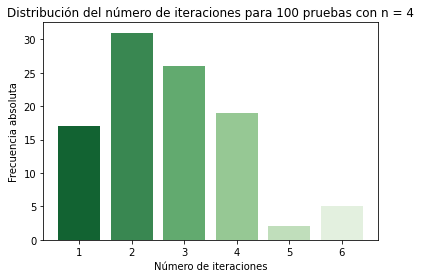

In [79]:
graph = sns.countplot(count_list, palette = 'Greens_r')
graph.set(title = 'Distribución del número de iteraciones para 100 pruebas con n = 4', xlabel = 'Número de iteraciones', ylabel = 'Frecuencia absoluta')
graph.plot()

n = 40

In [80]:
man_list = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
            'm11', 'm12', 'm13', 'm14', 'm15', 'm16', 'm17', 'm18', 'm19', 'm20',
            'm21', 'm22', 'm23', 'm24', 'm25', 'm26', 'm27', 'm28', 'm29', 'm30',
            'm31', 'm32', 'm33', 'm34', 'm35', 'm36', 'm37', 'm38', 'm39', 'm40']
women_list = ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10',
              'w11', 'w12', 'w13', 'w14', 'w15', 'w16', 'w17', 'w18', 'w19', 'w20',
              'w21', 'w22', 'w23', 'w24', 'w25', 'w26', 'w27', 'w28', 'w29', 'w30',
              'w31', 'w32', 'w33', 'w34', 'w35', 'w36', 'w37', 'w38', 'w39', 'w40']              
count_list = []
n = 40
for i in range (0, 100):
  women_df = pd.DataFrame({'w1': random_list(n), 'w2': random_list(n), 'w3':random_list(n), 'w4':random_list(n), 'w5':random_list(n), 'w6': random_list(n), 'w7':random_list(n), 'w8':random_list(n), 'w9':random_list(n), 'w10':random_list(n),
                           'w11': random_list(n), 'w12': random_list(n), 'w13':random_list(n), 'w14':random_list(n), 'w15':random_list(n), 'w16': random_list(n), 'w17':random_list(n), 'w18':random_list(n), 'w19':random_list(n), 'w20':random_list(n),
                           'w21': random_list(n), 'w22': random_list(n), 'w23':random_list(n), 'w24':random_list(n), 'w25':random_list(n), 'w26': random_list(n), 'w27':random_list(n), 'w28':random_list(n), 'w29':random_list(n), 'w30':random_list(n),
                           'w31': random_list(n), 'w32': random_list(n), 'w33':random_list(n), 'w34':random_list(n), 'w35':random_list(n), 'w36': random_list(n), 'w37':random_list(n), 'w38':random_list(n), 'w39':random_list(n), 'w40':random_list(n)})
  women_df.index = man_list
  man_df = pd.DataFrame({'w1': random_list(n), 'w2': random_list(n), 'w3':random_list(n), 'w4':random_list(n), 'w5':random_list(n), 'w6': random_list(n), 'w7':random_list(n), 'w8':random_list(n), 'w9':random_list(n), 'w10':random_list(n),
                         'w11': random_list(n), 'w12': random_list(n), 'w13':random_list(n), 'w14':random_list(n), 'w15':random_list(n), 'w16': random_list(n), 'w17':random_list(n), 'w18':random_list(n), 'w19':random_list(n), 'w20':random_list(n),
                         'w21': random_list(n), 'w22': random_list(n), 'w23':random_list(n), 'w24':random_list(n), 'w25':random_list(n), 'w26': random_list(n), 'w27':random_list(n), 'w28':random_list(n), 'w29':random_list(n), 'w30':random_list(n),
                         'w31': random_list(n), 'w32': random_list(n), 'w33':random_list(n), 'w34':random_list(n), 'w35':random_list(n), 'w36': random_list(n), 'w37':random_list(n), 'w38':random_list(n), 'w39':random_list(n), 'w40':random_list(n)})                         
  man_df.index = man_list
  proposals, count = gale(man_list, women_list, man_df, women_df)
  count_list.append(count)


print("Maximum number of iterations: ", max(count_list))
print("Minimum number of iterations: ", min(count_list))
print("Minimum number of iterations: ", average(count_list))

Maximum number of iterations:  121
Minimum number of iterations:  6
Minimum number of iterations:  39.35


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

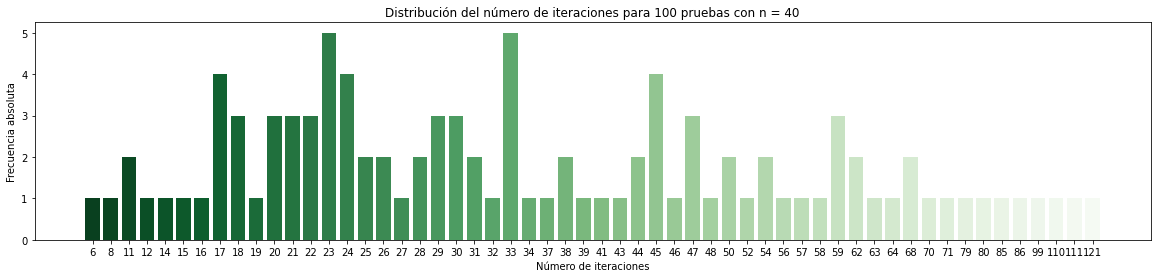

In [81]:
fig, ax = plt.subplots(figsize = (20, 4))
graph = sns.countplot(count_list, palette = 'Greens_r', ax=ax)
graph.set(title = 'Distribución del número de iteraciones para 100 pruebas con n = 40', xlabel = 'Número de iteraciones', ylabel = 'Frecuencia absoluta')
graph.plot()